In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../Resources/ML_Ready_Data/total_crime_adhoc.csv")

In [8]:
from scipy import stats
def normality_clean(df, z, col):
    #check if col parameter is priovided
    count_prior = len(df)
    if col != None:
        df = df.loc[df[col] > 0]
        count_after = len(df)
        print(f'Starting with {count_prior} rows, we have {count_after} rows after dropping dummies with 0 values')
    #drop all n_bound outliers
    df = df[(np.abs(stats.zscore(df)) < z).all(axis=1)]
    return df

In [9]:
df_norm = normality_clean(df, 3, "total_crime_10k")

Starting with 3128 rows, we have 2851 rows after dropping dummies with 0 values


In [10]:
def prep_X_y(df, y_col):
    X = df.drop([y_col, "fips_state_county_code"], axis=1)
    y = df[y_col]
    return X, y

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X, y = prep_X_y(df_norm, "total_crime_10k")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

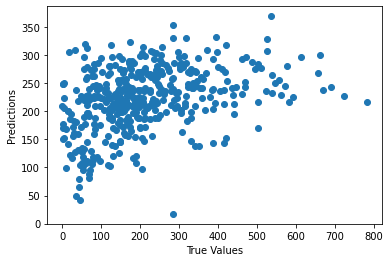

Score: 0.12607770523149708
Train Score: 0.13113753095708314


In [17]:
#begin linear reg
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
#show score
print(f"Score: {reg.score(X_test, y_test)}")
# show train score
print(f"Train Score: {reg.score(X_train, y_train)}")

In [17]:
coefs = reg.coef_.tolist()

In [19]:
coefs

[14.139471123106603,
 2.872892562346159,
 68808826898247.48,
 -2.6011860444291575,
 -27.82689514850989,
 -10.211539804828783,
 -21.546522024426693,
 2.813709889883791,
 15.702891325750674,
 5.998524632757295,
 433927235948132.2,
 466704881845101.56,
 453329528443243.6,
 112017247061287.83,
 478613242380791.56,
 560015197118831.4,
 496680958276622.8,
 -21063149393076.055,
 2749734439800.0913,
 7.435693991076114,
 -21.64460663638834,
 -0.6148874528867796,
 -1.8118780485840622,
 2.716463539155723,
 14.233266190806608]

In [23]:
for i in range(1,len(coefs)):
    print(f"{X.columns[i]}: {coefs[i]}")

Living Wage: 2.872892562346159
Poverty Wage: 68808826898247.48
Minimum Wage: -2.6011860444291575
Median_Household_Income_2019: -27.82689514850989
Med_HH_Income_Percent_of_State_Total_2019: -10.211539804828783
5_year_unemployment_delta: -21.546522024426693
population_2020: 2.813709889883791
10_year_pop_delta: 15.702891325750674
20_year_pop_delta: 5.998524632757295
rucc_Metro - Counties in metro areas of 1 million population or more                                                                                                                                         : 433927235948132.2
rucc_Metro - Counties in metro areas of 250,000 to 1 million population                                                                                                                                      : 466704881845101.56
rucc_Metro - Counties in metro areas of fewer than 250,000 population                                                                                                                  